**SVM - KLASIFIKASI**


In [ ]:
#import library and modul
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

Kode diatas dimaksud : mengimpor beberapa library dan modul yang digunakan untuk pemrosesan data dan pembuatan model. Ini termasuk numpy untuk operasi numerik, matplotlib untuk visualisasi, pandas untuk manipulasi data, serta beberapa modul dari scikit-learn seperti train_test_split untuk pembagian dataset, StandardScaler untuk penskalaan fitur, SVC untuk pembuatan model SVM, dan lainnya.

# EDA

In [ ]:
# Memuat dataset
dataset = pd.read_csv('data.csv')

# Memisahkan fitur dan target
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

# Membagi data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


Disini dilakukan pemrosesan data, dimana dataset dibaca dari file CSV, kemudian fitur dan target dipisahkan. Selanjutnya, data dibagi menjadi set latih dan uji untuk melatih dan menguji model.

# Processing Data

In [ ]:
#Processing data
# Mengubah label target menjadi bilangan bulat
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Mengisi nilai yang hilang dengan mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Penskalaan fitur
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

yang dilakukan adalah Mengubah label target menjadi bilangan bulat.Mengisi nilai yang hilang dengan mean.Penskalaan fitur menggunakan StandardScaler.

# Modelling

In [ ]:
# Membuat model SVM dengan kernel linear dan melatihnya pada set latih
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Memprediksi hasil set uji
y_pred = classifier.predict(X_test)

# Membuat confusion matriks
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Menampilkan hasil klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[88  2]
 [ 2 51]]

Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.98      0.98        90
           M       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Confusion Matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas, sedangkan Classification Report memberikan metrik presisi, recall, dan f1-score untuk setiap kelas, serta akurasi total model. Sehingga model SVM dengan kernel linear memiliki kinerja yang sangat baik dalam melakukan klasifikasi pada dataset ini, dengan presisi, recall, dan f1-score yang tinggi untuk kedua kelas. Akurasi model mencapai 97%, menunjukkan bahwa model tersebut dapat dengan baik membedakan antara kelas 'B' dan 'M' dalam dataset.

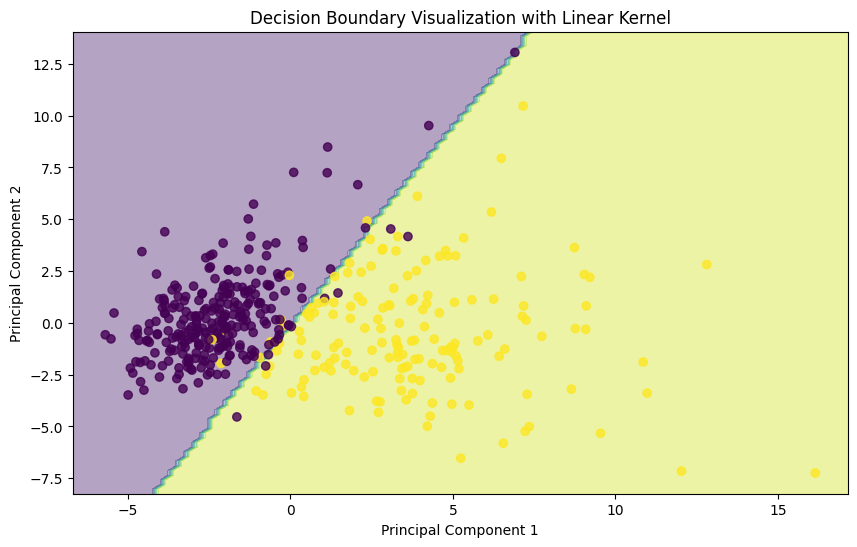

In [ ]:
# Mengurangi dimensi fitur menjadi dua dimensi dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Membuat meshgrid untuk plotting
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

# Pastikan tipe data float
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Membuat model SVM baru dengan kernel linear dan melatihnya pada data yang sudah direduksi dimensinya
classifier_linear = SVC(kernel='linear', random_state=0)
classifier_linear.fit(X_train_pca, y_train)

# Memprediksi kelas untuk setiap titik pada meshgrid dengan model kernel linear
Z_linear = classifier_linear.predict(np.c_[X_train_pca[:, 0].ravel(), X_train_pca[:, 1].ravel()])

# Membuat prediksi pada meshgrid menggunakan model SVM
Z_linear = classifier_linear.predict(np.c_[xx.ravel(), yy.ravel()])

# Mengubah hasil prediksi menjadi grid
Z_linear = Z_linear.reshape(xx.shape)

# Mengonversi Z_linear menjadi tipe data numerik
Z_linear_numeric = label_encoder.transform(Z_linear.ravel()).reshape(Z_linear.shape).astype(float)

# Plot batas keputusan dan titik-titik data dengan kernel linear
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_linear_numeric, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary Visualization with Linear Kernel')
plt.show()

Visualisasi ini menunjukkan bahwa SVM bekerja dengan baik karena titik data dipisahkan dengan jelas dan batas keputusannya halus. dan Visualisasi ini menunjukkan bahwa SVM telah berhasil mempelajari batas keputusan yang dapat digunakan untuk memisahkan kedua kelas titik data.

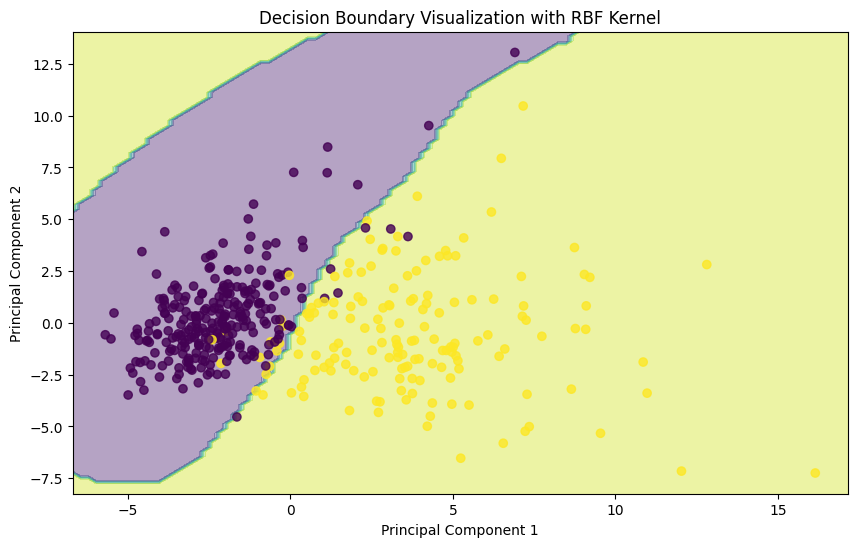

In [ ]:
# Membuat model SVM baru dengan kernel non-linear (RBF) dan melatihnya pada data yang sudah direduksi dimensinya
classifier_rbf = SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_train_pca, y_train)

# Memprediksi kelas untuk setiap titik pada meshgrid dengan model kernel non-linear (RBF)
Z_rbf = classifier_rbf.predict(np.c_[xx.ravel(), yy.ravel()])

# Mengubah hasil prediksi menjadi grid
Z_rbf = Z_rbf.reshape(xx.shape)

# Mengonversi Z_rbf menjadi tipe data numerik
Z_rbf_numeric = label_encoder.transform(Z_rbf.ravel()).reshape(Z_rbf.shape).astype(float)

# Plot batas keputusan dan titik-titik data dengan kernel non-linear (RBF)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_rbf_numeric, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_encoded, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary Visualization with RBF Kernel')
plt.show()


Kernel RBF membantu SVM menemukan batas keputusan yang lebih kompleks dibanding kernel linear.  Karena data yang dipisahkan dengan jelas oleh batas keputusan yang halus, visualisasi ini menunjukkan performa SVM yang baik.


## KESIMPULAN

**visualisasi batas keputusan dengan kernel linear dan RBF**

Kernel linear:
Cocok untuk data yang linearly separable.
Batas keputusan berupa garis lurus.
Lebih cepat dan efisien.

Kernel RBF:
Cocok untuk data yang non-linear.
Batas keputusan lebih kompleks (berupa kurva).
Lebih lambat dan membutuhkan lebih banyak memori.

**Memilih kernel:**

Kernel linear:
Data linearly separable.
Membutuhkan performa cepat.
Model sederhana.

Kernel RBF:
Data non-linear.
Membutuhkan batas keputusan kompleks.
Model lebih kompleks.


**Visualisasi:**

Kernel linear:
Lebih sederhana dan mudah dipahami.
Kernel RBF:
Lebih kompleks dan menunjukkan kemampuan SVM untuk menangani data non-linear.